# What sort of garage heater should my dad buy?

My dad makes furniture in a shop that's unattached from his house.  For years, he's heated the shop with scrap wood in a wood stove.  Recently, his home insurance premium has risen to \$2500/year.  He can switch home insurance companies and have a \$500 annual premium, but, he'll have to remove the wood stove and replace it with one or more electric heaters.

The shop is in central Minnesota. He uses the stove from November through March. Electricity costs \$0.10/kWh.  The shop is 40' by 24', 9' high.  The walls are insulated with 6" fiberglass batts.  There is one 32"x80" door, 6 2'x2' windows, and a double garage door in the first floor.  The garage door is insulated with 2" of foam.  The windows are approximately R-2.  Relevant climate information lives here: https://weatherspark.com/y/10478/Average-Weather-in-Monticello-Minnesota-United-States-Year-Round

## Questions:
1. How much power does the shop lose through the walls on a 15F day, if the shop is held at an inside temperature of 60F?
2. If paint freezes, it is spoiled for later use.  If my dad leaves on a trip for a week and it gets down to -20F at night, what heater power is necessary to hold the inside temperature at 45F?
3. Which heater should my dad buy?  He likes shopping at Menards, https://www.menards.com/main/heating-cooling/heaters/electric-garage-heaters/c-6328.htm
4. If the average inside temperature is 60F and the average outside temperature (over the whole heating season, 5 months) is 20F, how much will my dad pay for electricity?  If he switches insurance companies will he save money?

# TBD: This is a sketch of the shop

In [43]:
meters_per_foot=0.3048
height_m=9*meters_per_foot
width_m=40*meters_per_foot
depth_m=24*meters_per_foot
area_walls_m2=2*height_m*width_m+2*depth_m*width_m
A_roof_m2=width_m*depth_m
print("the wall surface area of the garage is ",area_walls_m2," (m^2)")
print("The roof has area",A_roof_m2,"(m^2)")


the wall surface area of the garage is  245.26402560000002  (m^2)
The roof has area 89.18691840000001 (m^2)


In [2]:
area_walls_m2

245.26402560000002

Simplest solution: ignore the garage door, service door, and the windows. Also ignore the roof (heat floats up to 2nd floor, which is well insulated and thus not a big loss).  The shop is a box with 2x6 walls of fiberglass.  This is an **underestimate** of the needed power.

In [3]:
T_in_F=60
T_out_F=15
T_in_C=(T_in_F-32.0)*5.0/9.0
T_out_C=(T_out_F-32.0)*5.0/9.0
dT_C=T_in_C-T_out_C
print("The walls have a temperature gradient of ",T_in_C," to ",T_out_C," both deg Celsius")
print("This is dT = ",dT_C, "C")


The walls have a temperature gradient of  15.555555555555555  to  -9.444444444444445  both deg Celsius
This is dT =  25.0 C


If the walls' only insulating value is the fiberglass batts, we can then estimate heat (power) loss with a 1-D version of Fourier's Law, https://en.wikipedia.org/wiki/Thermal_conduction, 

$\frac{Q}{dt}=k A \frac{dT}{dx}$.  

The thermal conductivity of fiberglass is pretty good, $k\approx 0.04 \frac{W}{m~K}$, See https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html

In [11]:
k_fiberglass_W_mK=0.04
dx_in=5.5
meters_per_inch=0.0254
dx_m=dx_in*meters_per_inch
p_W=k_fiberglass_W_mK*area_walls_m2*dT_C/dx_m
p_kW = p_W/1000
print("using fiberglass wall thickness of ",dx_m,"(m)")
print("power loss estimated to be ",p_W,"(W) or ",p_W/1000,"(kW)")

using fiberglass wall thickness of  0.1397 (m)
power loss estimated to be  1755.6480000000006 (W) or  1.7556480000000005 (kW)


How much will this cost?

In [12]:
# 5x30 day months
time_hrs=5*30*24
rate=0.1 # $/kWh
energy_kWh=time_hrs*p_kW
energy_cost=energy_kWh*rate
print("estimated seasonal use is ",energy_kWh," (kWh)")
print("cost: ",energy_cost,"USD")

estimated seasonal use is  6320.332800000002  (kWh)
cost:  632.0332800000002 USD


## Improvement: doors, windows, and roof

Metal service doors are normally filled with styrofoam, which has a thermal conductivity of $k=0.033 W/m~K$.  We can model the garage and service doors then as being 2" thick blocks of styrofoam.  Note, this model doesn't include the effects of drafts through the door. 

Similarly, we can model the windows as 6 2' squares with R-value of 2.  Note, this R-value is in "standard" inch-pound-BTU units. The relevant conversions are:

Heat conduction: $\frac{Q}{dt}=k A \frac{dT}{dx} = \frac{1}{R}A~ dT$, so $\frac{k}{dx}=\frac{1}{R}$.   

In the SI system, R-SI has units $\frac{m^2~K}{W}$, in the inch-pound (Menards) system, R-IP has units $\frac{ft^2~F~h}{BTU}$.

Also, RSI-value (in SI) = R-value (in I-P) × 0.1761101838

reference: https://en.wikipedia.org/wiki/R-value_(insulation)


In [44]:
# for the doors
k_foam_W_mK=0.033
dx_foam_m=2*meters_per_inch
A_door_m2=(32*80)*meters_per_inch**2
#assuming 16' by 7' double garage door
A_garage_door_m2=(16*7*12*12)*meters_per_inch**2
print("The door has area",A_door_m2,"(m^2)")
print("The garage door has area",A_garage_door_m2,"(m^2)")

The door has area 1.6516096 (m^2)
The garage door has area 10.40514048 (m^2)


Then, using the temperature difference from above, compute heat loss through the doors:

In [45]:
P_door_W=k_foam_W_mK*A_door_m2*dT_C/dx_foam_m
print("door power loss:",P_door_W,"(W)")

P_garage_door_W=k_foam_W_mK*A_garage_door_m2*dT_C/dx_foam_m
print("garage door power loss:",P_garage_door_W,"(W)")

door power loss: 26.822400000000002 (W)
garage door power loss: 168.98112000000003 (W)


For the windows, recall $\frac{Q}{dt}=\frac{1}{R}~A~ dT$:

In [46]:
# for the windows
R_window_IP=2
R_window_SI=R_window_IP*0.1761101838
print("The windows have an R-SI value of",R_window_SI)
A_window_m2=(2*2*12*12)*meters_per_inch**2
print("each window has an area of ",A_window_m2,"(m^2)")

P_window_W=(A_window_m2/R_window_SI)*dT_C
print("each window loses ",P_window_W,"(W)")
P_6window_W=6*P_window_W
print("total (6) window loss is",P_6window_W,"(W)")

The windows have an R-SI value of 0.3522203676
each window has an area of  0.37161215999999997 (m^2)
each window loses  26.376396297872695 (W)
total (6) window loss is 158.25837778723616 (W)


Including the windows and doors means that the loss through the walls needs to be recomputed (with smaller area).

In [48]:
area_cutouts_m2=6*A_window_m2+A_door_m2+A_garage_door_m2

P_walls_W=k_fiberglass_W_mK*(area_walls_m2-area_cutouts_m2)*dT_C/dx_m

print("revised estimate: power lost through walls: ",P_walls_W,"(W)")


revised estimate: power lost through walls:  1653.3829818181823 (W)


Finally, include the roof, which we'll model as a simple 6" plate of fiberglass.

In [53]:
dx_roof_m=5.5*meters_per_inch
P_roof_W=k_fiberglass_W_mK*A_roof_m2*dT_C/dx_roof_m

print("power lost through roof: ",P_roof_W,"(W)")


power lost through roof:  638.4174545454547 (W)


Summary:

In [54]:
print("Summary: Power losses in Watts")
print("Walls: ",P_walls_W)
print("6 windows: ",P_6window_W)
print("service door: ",P_door_W)
print("garage door: ",P_garage_door_W)
print("roof: ",P_roof_W)
P_total_W=P_walls_W+P_6window_W+P_door_W+P_garage_door_W+P_roof_W
print("Total: ",P_total_W)

Summary: Power losses in Watts
Walls:  1653.3829818181823
6 windows:  158.25837778723616
service door:  26.822400000000002
garage door:  168.98112000000003
roof:  638.4174545454547
Total:  2645.8623341508733


## Revised: How much will this cost?

In [75]:
# 5x30 day months
time_hrs=5*30*24
rate=0.1 # $/kWh
energy_kWh=time_hrs*(P_total_W/1000)
energy_cost=energy_kWh*rate
print("estimated seasonal use is ",energy_kWh," (kWh)")
print("cost: ",energy_cost,"USD")

estimated seasonal use is  9525.104402943143  (kWh)
cost:  952.5104402943143 USD


## How does the power loss depend on the outside temperature?

In the calculation so far the temperature difference across the wall has been held at 65F inside, 20F outside.  The temperatures  enter the calculation as a difference, so one useful summary of the calculation is to list the power loss as a function of the temperature gradient across the wall.  Mathematically, this looks like:

$\frac{Q}{dt}=
\left(\frac{1}{R}~A\right)_{window}~ dT+\left(\frac{k~A}{dx}\right)_{Walls}~dT+\left(\frac{k~A}{dx}\right)_{door}~dT+\left(\frac{k~A}{dx}\right)_{Garage~door}~dT+\left(\frac{k~A}{dx}\right)_{roof}~dT$

or

$\frac{Q}{dt}=
\left[
\left(\frac{1}{R}~A\right)_{window}+\left(\frac{k~A}{dx}\right)_{Walls}
+\left(\frac{k~A}{dx}\right)_{door}+\left(\frac{k~A}{dx}\right)_{Garage~door}
+\left(\frac{k~A}{dx}\right)_{roof}
\right] \cdot dT$

In heat transfer courses, this problem is formulated as a bunch of resistors in parallel.  The temperature difference is like a voltage and the heat flow is like a current.  The analogy goes as far as to call the $\left(\frac{k~A}{dx}\right)_{Walls}$ term "Thermal Resistance" with the following "circuit" diagram.

# Need a sketch of thermal circuit flow diagram. 

In practice, a graph of power loss vs temperature is a nice way to summarize the result.  

In [55]:
T_R_walls=k_fiberglass_W_mK*(area_walls_m2-area_cutouts_m2)/dx_m
T_R_door=k_foam_W_mK*A_door_m2/dx_foam_m
T_R_garage_door=k_foam_W_mK*A_garage_door_m2/dx_foam_m
T_R_6window=6.0*(A_window_m2/R_window_SI)
T_R_roof=k_fiberglass_W_mK*A_roof_m2/dx_roof_m
total_thermal_resistance=T_R_walls+T_R_door+T_R_garage_door+T_R_6window+T_R_roof
dT_vals_C=[]
dT_vals_F=[]
P_vals_kW=[]
BTU_p_hr_per_W=3.412
P_vals_BTU_p_hr=[]
for dT in range(0,50):
    dT_vals_C.append(dT)
    dT_vals_F.append(dT*9.0/5.0)
    P_W=total_thermal_resistance*dT
    P_vals_kW.append(P_W/1000)
    P_vals_BTU_p_hr.append(P_W*BTU_p_hr_per_W)

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0,0.5,'Power Loss (kW)')

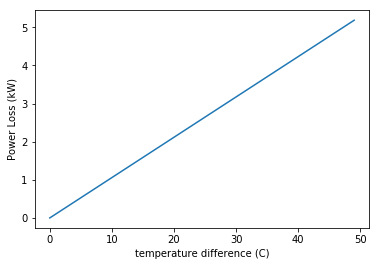

In [57]:
plt.plot(dT_vals_C,P_vals_kW)
plt.xlabel("temperature difference (C)")
plt.ylabel("Power Loss (kW)")

Text(0,0.5,'Power Loss (BTU/hr)')

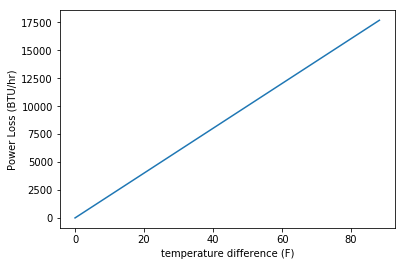

In [58]:
plt.plot(dT_vals_F,P_vals_BTU_p_hr)
plt.xlabel("temperature difference (F)")
plt.ylabel("Power Loss (BTU/hr)")

Text(0.5,1,'If the inside temperarure is 60F, heat loss is:')

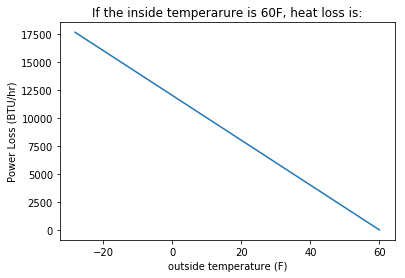

In [71]:
TF_out_vals = [60-x for x in dT_vals_F]
plt.plot(TF_out_vals,P_vals_BTU_p_hr)
plt.xlabel("outside temperature (F)")
plt.ylabel("Power Loss (BTU/hr)")
plt.title("If the inside temperarure is 60F, heat loss is:")

Text(0.5,1,'If the inside temperarure is 60F, heat loss is:')

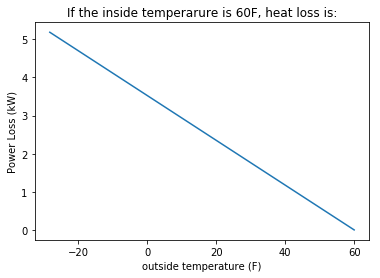

In [73]:
plt.plot(TF_out_vals,P_vals_kW)
plt.xlabel("outside temperature (F)")
plt.ylabel("Power Loss (kW)")
plt.title("If the inside temperarure is 60F, heat loss is:")

In [ ]:
# Improvements to be made:
1. extra energy costs at N air changes per hour (to account for drafts).
2. 2nd floor is 24'x24'x9' w/ 6" insulation.
3. How dows the garage respond when you turn the heater up by 10F (model as an air+tablesaw lumped system).
